In [1]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("..") 
from gcforest.gcforest import GCForest
import cmaes as cma

/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
random_seed = 42

In [3]:
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = random_seed
    ca_config["max_layers"] = 20
    ca_config["early_stopping_rounds"] = 5
    ca_config["n_classes"] = 6
    ca_config["estimators"] = []
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "RandomForestClassifier", "random_state" : random_seed})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "DecisionTreeClassifier"})
    ca_config["estimators"].append({"n_folds": 5, "type": "LogisticRegression"})
    config["cascade"] = ca_config
    return config

In [4]:
path = os.getcwd()+'/../data/20122018freshwater_four_feature.csv'
data = pd.read_csv(path, na_values = np.nan)

In [5]:
# training/valid/test: 0.6/0.2/0.2
X = data.drop(['本周水质'], axis=1).values # Series
y = data['本周水质'].values-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                       stratify = y, random_state = random_seed)
# Z-score
clean_pipeline = Pipeline([('imputer', preprocessing.Imputer(missing_values='NaN',strategy="median")),
                           ('std_scaler', preprocessing.StandardScaler()),])
X_train = clean_pipeline.fit_transform(X_train)
X_test = clean_pipeline.fit_transform(X_test)
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.25, 
                                       stratify = y_train, random_state = random_seed)

In [6]:
config = get_toy_config()

models = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=random_seed),
    ExtraTreesClassifier(random_state=random_seed),
    GCForest(config)
]

y_pred_proba_all = []

for model in models:
    model_name = model.__class__.__name__
    if model_name == 'GCForest':
        model.fit_transform(X_train2, y_train2, X_test, y_test)
    else:
        model.fit(X_train2, y_train2)
    y_pred_proba = model.predict_proba(X_valid)
    # y_pred = model.predict(X_valid)
    # print("%s, validation set: weighted F1 score:%f, Accuracy:%f" %(model_name, f1_score(y_valid, y_pred, average="weighted"), accuracy_score(y_valid, y_pred)))
    y_pred_proba_all.append(y_pred_proba)

[ 2019-02-16 16:43:42,734][cascade_classifier.fit_transform] X_groups_train.shape=[(20166, 4)],y_train.shape=(20166,),X_groups_test.shape=[(6723, 4)],y_test.shape=(6723,)
[ 2019-02-16 16:43:42,736][cascade_classifier.fit_transform] group_dims=[4]
[ 2019-02-16 16:43:42,737][cascade_classifier.fit_transform] group_starts=[0]
[ 2019-02-16 16:43:42,738][cascade_classifier.fit_transform] group_ends=[4]
[ 2019-02-16 16:43:42,739][cascade_classifier.fit_transform] X_train.shape=(20166, 4),X_test.shape=(6723, 4)
[ 2019-02-16 16:43:42,741][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(20166, 4), X_cur_test.shape=(6723, 4)
[ 2019-02-16 16:43:42,871][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_0.predict)=99.53%
[ 2019-02-16 16:43:43,008][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimator_0 - 5_folds.train_1.predict)=99.58%
[ 2019-02-16 16:43:43,154][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_0 - estimat

[ 2019-02-16 16:43:46,678][cascade_classifier.fit_transform] [layer=1] look_indexs=[0], X_cur_train.shape=(20166, 52), X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:43:46,934][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_0.predict)=99.50%
[ 2019-02-16 16:43:47,218][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_1.predict)=99.45%
[ 2019-02-16 16:43:47,457][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_2.predict)=99.45%
[ 2019-02-16 16:43:47,688][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_3.predict)=99.33%
[ 2019-02-16 16:43:47,902][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_4.predict)=99.50%
[ 2019-02-16 16:43:47,917][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - estimator_0 - 5_folds.train_cv.predict)=99.45%
[ 2019-02-16 16:43:47,920][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_1 - es

[ 2019-02-16 16:43:58,101][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_0 - 5_folds.train_cv.predict)=99.42%
[ 2019-02-16 16:43:58,104][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_0 - 5_folds.test.predict)=97.66%
[ 2019-02-16 16:43:58,376][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_0.predict)=99.53%
[ 2019-02-16 16:43:58,723][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_1.predict)=99.48%
[ 2019-02-16 16:43:59,029][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_2.predict)=99.38%
[ 2019-02-16 16:43:59,307][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_3.predict)=99.48%
[ 2019-02-16 16:43:59,492][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.train_4.predict)=99.33%
[ 2019-02-16 16:43:59,508][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_2 - estimator_1 - 5_folds.tr

[ 2019-02-16 16:44:08,911][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.train_4.predict)=99.45%
[ 2019-02-16 16:44:08,927][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.train_cv.predict)=99.43%
[ 2019-02-16 16:44:08,930][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_1 - 5_folds.test.predict)=97.66%
[ 2019-02-16 16:44:09,148][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_0.predict)=99.36%
[ 2019-02-16 16:44:09,365][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_1.predict)=99.43%
[ 2019-02-16 16:44:09,576][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_2.predict)=99.48%
[ 2019-02-16 16:44:09,767][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.train_3.predict)=99.53%
[ 2019-02-16 16:44:09,967][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_3 - estimator_2 - 5_folds.tr

[ 2019-02-16 16:44:19,416][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_3.predict)=99.55%
[ 2019-02-16 16:44:19,622][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_4.predict)=99.35%
[ 2019-02-16 16:44:19,640][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.train_cv.predict)=99.43%
[ 2019-02-16 16:44:19,644][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_2 - 5_folds.test.predict)=97.66%
[ 2019-02-16 16:44:20,054][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_0.predict)=99.41%
[ 2019-02-16 16:44:20,261][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_1.predict)=99.33%
[ 2019-02-16 16:44:20,502][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.train_2.predict)=99.41%
[ 2019-02-16 16:44:20,743][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_4 - estimator_3 - 5_folds.tr

[ 2019-02-16 16:44:31,374][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_2.predict)=99.40%
[ 2019-02-16 16:44:31,546][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_3.predict)=99.58%
[ 2019-02-16 16:44:31,729][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_4.predict)=99.38%
[ 2019-02-16 16:44:31,742][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.train_cv.predict)=99.43%
[ 2019-02-16 16:44:31,745][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_3 - 5_folds.test.predict)=97.66%
[ 2019-02-16 16:44:31,942][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_0.predict)=98.93%
[ 2019-02-16 16:44:32,140][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.train_1.predict)=98.81%
[ 2019-02-16 16:44:32,326][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_5 - estimator_4 - 5_folds.tr

[ 2019-02-16 16:44:40,820][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_0.predict)=98.83%
[ 2019-02-16 16:44:41,014][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_1.predict)=98.83%
[ 2019-02-16 16:44:41,211][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_2.predict)=98.76%
[ 2019-02-16 16:44:41,395][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_3.predict)=98.73%
[ 2019-02-16 16:44:41,567][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_4.predict)=98.66%
[ 2019-02-16 16:44:41,575][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.train_cv.predict)=98.76%
[ 2019-02-16 16:44:41,578][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_4 - 5_folds.test.predict)=97.62%
[ 2019-02-16 16:44:41,801][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_6 - estimator_5 - 5_folds.tr

[ 2019-02-16 16:44:50,517][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_4 - 5_folds.test.predict)=97.59%
[ 2019-02-16 16:44:50,710][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_0.predict)=98.61%
[ 2019-02-16 16:44:50,881][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_1.predict)=98.89%
[ 2019-02-16 16:44:51,062][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_2.predict)=98.79%
[ 2019-02-16 16:44:51,240][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_3.predict)=98.71%
[ 2019-02-16 16:44:51,431][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_4.predict)=98.69%
[ 2019-02-16 16:44:51,439][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.train_cv.predict)=98.74%
[ 2019-02-16 16:44:51,444][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_7 - estimator_5 - 5_folds.te

[ 2019-02-16 16:45:00,471][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_5 - 5_folds.train_cv.predict)=98.85%
[ 2019-02-16 16:45:00,474][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_5 - 5_folds.test.predict)=97.60%
[ 2019-02-16 16:45:00,691][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_0.predict)=98.93%
[ 2019-02-16 16:45:00,895][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_1.predict)=98.89%
[ 2019-02-16 16:45:01,095][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_2.predict)=98.91%
[ 2019-02-16 16:45:01,308][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_3.predict)=98.46%
[ 2019-02-16 16:45:01,514][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.train_4.predict)=99.03%
[ 2019-02-16 16:45:01,520][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_8 - estimator_6 - 5_folds.tr

[ 2019-02-16 16:45:11,172][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_6 - 5_folds.train_4.predict)=98.86%
[ 2019-02-16 16:45:11,178][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_6 - 5_folds.train_cv.predict)=98.84%
[ 2019-02-16 16:45:11,182][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_6 - 5_folds.test.predict)=97.53%
[ 2019-02-16 16:45:11,734][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_0.predict)=99.53%
[ 2019-02-16 16:45:12,181][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_1.predict)=99.38%
[ 2019-02-16 16:45:12,635][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_2.predict)=99.38%
[ 2019-02-16 16:45:13,112][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.train_3.predict)=99.43%
[ 2019-02-16 16:45:13,617][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_9 - estimator_7 - 5_folds.tr

[ 2019-02-16 16:45:21,934][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_2.predict)=99.36%
[ 2019-02-16 16:45:22,426][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_3.predict)=99.48%
[ 2019-02-16 16:45:22,925][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_4.predict)=99.43%
[ 2019-02-16 16:45:22,933][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.train_cv.predict)=99.44%
[ 2019-02-16 16:45:22,936][kfold_wrapper.log_eval_metrics] Weighted F1 (layer_10 - estimator_7 - 5_folds.test.predict)=97.63%
[ 2019-02-16 16:45:22,942][cascade_classifier.calc_f1] Weighted F1 (layer_10 - train.classifier_average)=99.43%
[ 2019-02-16 16:45:22,945][cascade_classifier.calc_f1] Weighted F1 (layer_10 - test.classifier_average)=97.63%
[ 2019-02-16 16:45:22,946][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, weighted_f1_train=99.44

In [7]:
y_pred_proba_all = np.asarray(y_pred_proba_all)
# np.save("../npy/y_pred_proba_all.npy", y_pred_proba_all)

In [8]:
# y_pred_proba_all = np.load("../npy/y_pred_proba_all.npy")

In [9]:
es = cma.CMAEvolutionStrategy(10 * [0], 0.5)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=384594, Sat Feb 16 16:45:24 2019)


In [10]:
# help(cma)
# help(es)

In [11]:
# score = "f1_weighted"
score = "accuracy"
while not es.stop():
    solutions = es.ask()
    es.tell(solutions, [cma.ff.water_ensemble(x, y_pred_proba_all, y_valid, metric=score) for x in solutions])
    es.logger.add()  # write data to disc to be plotted
    es.disp()

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -9.933065595716198e-01 1.0e+00 4.95e-01  5e-01  5e-01 0:00.0
    2     20 -9.936040458128812e-01 1.2e+00 5.00e-01  5e-01  5e-01 0:00.1
    3     30 -9.941990182954038e-01 1.3e+00 5.59e-01  5e-01  6e-01 0:00.2
WARNING (iteration=7):  flat fitness (f=-0.994199, sigma=7.80e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=7):  flat fitness (f=-0.994199, sigma=7.80e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=11):  flat fitness (f=-0.994199, sigma=7.42e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the

WARNING (iteration=37):  flat fitness (f=-0.994348, sigma=1.39e+00).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=37):  flat fitness (f=-0.994348, sigma=1.39e+00).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=38):  flat fitness (f=-0.994348, sigma=1.34e+00).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=38):  flat fitness (f=-0.994348, sigma=1.34e+00).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
WARNING (iteration=3

WARNING (iteration=56):  flat fitness (f=-0.994348, sigma=8.87e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.


In [12]:
es.result_pretty()  # pretty print result

WARNING (iteration=56):  flat fitness (f=-0.994348, sigma=8.87e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
termination on tolfun=1e-11
termination on tolfunhist=1e-12
termination on flat fitness=please (re)consider how to compute the fitness more elaborately if sigma=8.87e-01 is large
final/bestever f-value = -9.943478e-01 -9.943478e-01
incumbent solution: [-6.38979541  2.01774576 -1.74600485  0.73646182 -5.3406629  -5.95465477
 -3.84825153 -9.91461853 ...]
std deviations: [0.73343183 0.75070083 0.82945203 0.8873282  0.86975882 0.74401706
 0.75521807 1.1329455  ...]


CMAEvolutionStrategyResult(xbest=array([-1.17193396,  0.90134082, -2.38253153,  1.23303514, -1.68266421,
       -0.91595853, -2.61863357,  4.27718859, -0.11942556,  3.4773124 ]), fbest=-0.9943477614160345, evals_best=118, evaluations=560, iterations=56, xfavorite=array([-6.38979541,  2.01774576, -1.74600485,  0.73646182, -5.3406629 ,
       -5.95465477, -3.84825153, -9.91461853,  0.38649555, 12.85642555]), stds=array([0.73343183, 0.75070083, 0.82945203, 0.8873282 , 0.86975882,
       0.74401706, 0.75521807, 1.1329455 , 0.72356761, 1.0115847 ]))

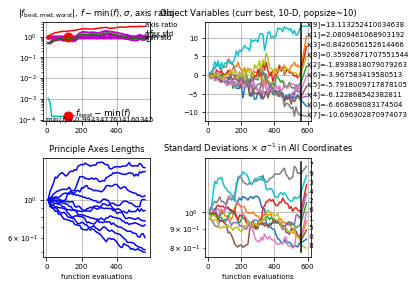

In [13]:
cma.plot()

In [14]:
weights = np.exp(es.result.xbest)/np.sum(np.exp(es.result.xbest))

In [15]:
# weights of each base models
weights

array([0.00275954, 0.02194061, 0.0008224 , 0.03057044, 0.00165588,
       0.00356456, 0.00064945, 0.64174238, 0.00790561, 0.28838914])

In [16]:
y_test_pred_proba_all = []

for model in models:
    model_name = model.__class__.__name__
    y_test_pred_proba = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    print("%s, test weighted f1 score:%f" %(model_name, f1_score(y_test, y_test_pred, average="weighted")))
    y_test_pred_proba_all.append(y_test_pred_proba)

y_test_pred_ensemble_proba = np.zeros((len(y_test), 6)) # 集成器概率向量


# 为每一个基学习器乘上权重
for k in range(10):
    y_test_pred_ensemble_proba += y_test_pred_proba_all[k] * weights[k]
y_test_pred_ensemble = np.argmax(y_test_pred_ensemble_proba, axis=1)

print("NCE")
print(classification_report(y_test, y_test_pred_ensemble, digits=4))

cm = confusion_matrix(y_test, y_test_pred_ensemble)
i=0
acc_all = np.zeros(6)
for c in cm:
    acc_all[i] = c[i]/np.sum(c)
    print("%d accuaracy: %f" %(i+1, acc_all[i]))
    i=i+1
print("acc:", np.sum(y_test == y_test_pred_ensemble)/y_test_pred_ensemble.shape[0])
print('f1_weighted', f1_score(y_test, y_test_pred_ensemble, average='weighted'))

LogisticRegression, test weighted f1 score:0.620574
LinearDiscriminantAnalysis, test weighted f1 score:0.576099


/Users/alex/anaconda/envs/gc/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[ 2019-02-16 16:45:30,402][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2019-02-16 16:45:30,405][cascade_classifier.transform] group_dims=[4]
[ 2019-02-16 16:45:30,406][cascade_classifier.transform] X_test.shape=(6723, 4)
[ 2019-02-16 16:45:30,408][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(6723, 4)


SVC, test weighted f1 score:0.894545
DecisionTreeClassifier, test weighted f1 score:0.971288
ExtraTreeClassifier, test weighted f1 score:0.883773
GaussianNB, test weighted f1 score:0.822296
KNeighborsClassifier, test weighted f1 score:0.897799
RandomForestClassifier, test weighted f1 score:0.976184
ExtraTreesClassifier, test weighted f1 score:0.962632


[ 2019-02-16 16:45:30,577][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:45:30,758][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:45:30,926][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:45:31,093][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:45:31,263][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(6723, 52)
[ 2019-02-16 16:45:31,426][cascade_classifier.transform] X_groups_test.shape=[(6723, 4)]
[ 2019-02-16 16:45:31,427][cascade_classifier.transform] group_dims=[4]
[ 2019-02-16 16:45:31,428][cascade_classifier.transform] X_test.shape=(6723, 4)
[ 2019-02-16 16:45:31,429][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(6723, 4)
[ 2019-02-16 16:45:31,583][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cu

GCForest, test weighted f1 score:0.976321
NCE
             precision    recall  f1-score   support

          0     0.9082    0.9939    0.9491       488
          1     0.9927    0.9759    0.9842      2655
          2     0.9835    0.9801    0.9818      1760
          3     0.9779    0.9698    0.9738      1094
          4     0.9327    0.9327    0.9327       297
          5     0.9594    0.9907    0.9748       429

avg / total     0.9770    0.9763    0.9765      6723

1 accuaracy: 0.993852
2 accuaracy: 0.975895
3 accuaracy: 0.980114
4 accuaracy: 0.969835
5 accuaracy: 0.932660
6 accuaracy: 0.990676
acc: 0.9763498438197233
f1_weighted 0.9764717843100634
